# Objective
---------------

Data Exploration

+ **Author:** Victor Rosales
+ **Data:** 07/09/2025

# Libraries

In [336]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly_express as px

import plotly_express as px
import pandas as pd
import numpy as np

import os

# Classes and Functions

# Load data

## Based on the exploration

In [68]:
# Not useful columns
drop_columns = [
    'area', 
    'area_title',
    'area_type', 
    'naics', 
    'naics_title', 
    'i_group',
    'own_code', 
    'jobs_1000',
    'loc_quotient',
    'pct_total',
    'annual', 
    'hourly', 
    'mean_prse', 
    'emp_prse'
]

In [69]:
# columns that should be numeric
numeric_columns = [
    'h_mean',
    'h_pct10', 
    'h_pct25', 
    'h_median', 
    'h_pct75',
    'h_pct90', 
    'a_mean', 
    'a_pct10', 
    'a_pct25', 
    'a_median', 
    'a_pct75', 
    'a_pct90'
]

## ETL

In [70]:
data_folder = "../data"

os.listdir(data_folder)

['income.csv',
 'national_M2019_dl.xlsx',
 'national_M2020_dl.xlsx',
 'national_M2021_dl.xlsx',
 'national_M2022_dl.xlsx',
 'national_M2023_dl.xlsx',
 'national_M2024_dl.xlsx',
 'test.csv']

In [340]:
df_consolidated = pd.DataFrame()

raw_files = [file_name for file_name in os.listdir(data_folder) if "national" in file_name]

for file_name in raw_files:
    # load data
    df = pd.read_excel(f"{data_folder}/{file_name}")
    # remove unnecessary columns 
    df.columns = df.columns.str.lower()
    df = df.drop(columns=drop_columns)

    # Remove non-numeric values from numeric columns
    df_num = df.loc[:, numeric_columns].copy()

    for column in df_num.columns:
        df_num.loc[df_num[column] == "#", column] = None
        df_num.loc[df_num[column] == "*", column] = None
        df_num.loc[df_num[column] == "**", column] = None
    
    df_num = df_num.apply(pd.to_numeric)

    # Impute data using ML MICE - imputation
    imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)
    
    imputed_data = imputer.fit_transform(df_num)
    df_imputed = pd.DataFrame(imputed_data, columns=df_num.columns)

    df.loc[:, numeric_columns] = df_imputed.round(2)
    df[numeric_columns] = df[numeric_columns].astype(float)

    # rename columns to be more understandable
    df.columns = df.columns.str.replace("a_", "annual_")
    df.columns = df.columns.str.replace("h_", "hourly_")
    df.columns = df.columns.str.replace("occ", "occupation")
    df.columns = df.columns.str.replace("pct", "percentile_")
    df.columns = df.columns.str.replace("median", "percentile_50")
    df.columns = df.columns.str.replace("tot_emp", "total_employment")
    df.columns = df.columns.str.replace("o_group", "occupation_level")

    # add year of the data
    df["year"] = int(file_name[10:14])

    df_consolidated = pd.concat([df_consolidated, df])

    # break

# remove unnecessary columns that are not in all files
df_consolidated = df_consolidated.drop(columns=['prim_state', 'percentile__rpt']) # , 'occupation_code'

C:\Users\Vicros2022\venvs\data_vis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

C:\Users\Vicros2022\venvs\data_vis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

C:\Users\Vicros2022\venvs\data_vis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

C:\Users\Vicros2022\venvs\data_vis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

C:\Users\Vicros2022\venvs\data_vis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [341]:
df_consolidated 

,occupation_code,occupation_title,occupation_level,total_employment,hourly_mean,annual_mean,hourly_percentile_10,hourly_percentile_25,hourly_percentile_50,hourly_percentile_75,hourly_percentile_90,annual_percentile_10,annual_percentile_25,annual_percentile_50,annual_percentile_75,annual_percentile_90,year
0,00-0000,All Occupations,total,146875480,25.72,53490.0,10.35,13.02,19.14,30.88,48.57,21530.0,27080.0,39810.0,64240.00,101020.00,2019
1,11-0000,Management Occupations,major,8054120,58.88,122480.0,24.03,34.35,50.80,74.16,103.87,49990.0,71460.0,105660.0,154260.00,216019.49,2019
2,11-1000,Top Executives,minor,2658440,61.09,127070.0,21.01,31.69,49.63,78.83,115.46,43710.0,65910.0,103230.0,163970.00,240224.53,2019
3,11-1010,Chief Executives,broad,205890,93.20,193850.0,29.95,54.23,88.68,122.99,160.24,62290.0,112790.0,184460.0,255891.66,333318.00,2019
4,11-1011,Chief Executives,detailed,205890,93.20,193850.0,29.95,54.23,88.68,122.99,160.24,62290.0,112790.0,184460.0,255891.66,333318.00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,53-7081,Refuse and Recyclable Material Collectors,detailed,139180,24.62,51210.0,15.29,18.43,23.24,29.33,36.16,31810.0,38330.0,48350.0,61010.00,75200.00,2024
1399,53-7120,"Tank Car, Truck, and Ship Loaders",broad,10920,28.85,60010.0,18.39,22.72,27.92,34.25,42.36,38260.0,47260.0,58070.0,71230.00,88120.00,2024
1400,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,10920,28.85,60010.0,18.39,22.72,27.92,34.25,42.36,38260.0,47260.0,58070.0,71230.00,88120.00,2024
1401,53-7190,Miscellaneous Material Moving Workers,broad,25190,22.43,46650.0,16.00,17.06,20.04,24.45,31.18,33280.0,35470.0,41690.0,50850.00,64850.00,2024


In [342]:
# only consider 3 top levels -- other levels are too detailed and contain thousands of options 
occupation_level_list = ["major", "minor"]

df_final = df_consolidated.loc[df_consolidated["occupation_level"].isin(occupation_level_list)]

In [343]:
df_final

,occupation_code,occupation_title,occupation_level,total_employment,hourly_mean,annual_mean,hourly_percentile_10,hourly_percentile_25,hourly_percentile_50,hourly_percentile_75,hourly_percentile_90,annual_percentile_10,annual_percentile_25,annual_percentile_50,annual_percentile_75,annual_percentile_90,year
1,11-0000,Management Occupations,major,8054120,58.88,122480.0,24.03,34.35,50.80,74.16,103.87,49990.0,71460.0,105660.0,154260.0,216019.49,2019
2,11-1000,Top Executives,minor,2658440,61.09,127070.0,21.01,31.69,49.63,78.83,115.46,43710.0,65910.0,103230.0,163970.0,240224.53,2019
9,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,770540,68.91,143330.0,30.74,42.97,61.96,86.06,115.96,63940.0,89380.0,128870.0,179010.0,241152.89,2019
17,11-3000,Operations Specialties Managers,minor,1996160,64.69,134550.0,31.99,42.33,58.15,78.39,105.80,66540.0,88050.0,120960.0,163050.0,220028.33,2019
36,11-9000,Other Management Occupations,minor,2628970,49.31,102560.0,21.43,30.17,43.90,61.69,82.13,44560.0,62760.0,91300.0,128310.0,170820.00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,53-3000,Motor Vehicle Operators,minor,4328760,24.89,51770.0,14.82,18.58,23.40,29.49,36.63,30820.0,38650.0,48660.0,61330.0,76200.00,2024
1340,53-4000,Rail Transportation Workers,minor,101190,36.10,75090.0,24.73,30.15,36.53,39.65,47.24,51440.0,62720.0,75990.0,82460.0,98260.00,2024
1352,53-5000,Water Transportation Workers,minor,77710,38.54,80150.0,17.77,23.13,31.97,48.63,66.96,36960.0,48100.0,66490.0,101140.0,139270.00,2024
1360,53-6000,Other Transportation Workers,minor,330140,19.54,40640.0,13.36,15.00,17.34,20.54,27.60,27790.0,31200.0,36060.0,42730.0,57410.00,2024


In [344]:
# table to store the final ocuppation codes and descriptions
df_final_codes = df_final[['occupation_code', 'occupation_level', 'occupation_title']]
df_final_codes = df_final_codes.drop_duplicates()
df_final_codes = df_final_codes.reset_index(drop=True)

df_final_codes

,occupation_code,occupation_level,occupation_title
0,11-0000,major,Management Occupations
1,11-1000,minor,Top Executives
2,11-2000,minor,"Advertising, Marketing, Promotions, Public Rel..."
3,11-3000,minor,Operations Specialties Managers
4,11-9000,minor,Other Management Occupations
...,...,...,...
111,53-5000,minor,Water Transportation Workers
112,53-6000,minor,Other Transportation Workers
113,53-7000,minor,Material Moving Workers
114,39-4000,minor,Funeral Service Workers


In [350]:
# only consider anual data columns
data_columns = ["total_employment"] + [column for column in df_final.columns if "annual" in column]

df_data_aux = df_final[["occupation_code"] + data_columns] # add occupation_code to join with description
df_data_aux

,occupation_code,total_employment,annual_mean,annual_percentile_10,annual_percentile_25,annual_percentile_50,annual_percentile_75,annual_percentile_90
1,11-0000,8054120,122480.0,49990.0,71460.0,105660.0,154260.0,216019.49
2,11-1000,2658440,127070.0,43710.0,65910.0,103230.0,163970.0,240224.53
9,11-2000,770540,143330.0,63940.0,89380.0,128870.0,179010.0,241152.89
17,11-3000,1996160,134550.0,66540.0,88050.0,120960.0,163050.0,220028.33
36,11-9000,2628970,102560.0,44560.0,62760.0,91300.0,128310.0,170820.00
...,...,...,...,...,...,...,...,...
1326,53-3000,4328760,51770.0,30820.0,38650.0,48660.0,61330.0,76200.00
1340,53-4000,101190,75090.0,51440.0,62720.0,75990.0,82460.0,98260.00
1352,53-5000,77710,80150.0,36960.0,48100.0,66490.0,101140.0,139270.00
1360,53-6000,330140,40640.0,27790.0,31200.0,36060.0,42730.0,57410.00


In [351]:
df_final_data = pd.DataFrame()

for column in data_columns:
    df_pivoted = df_final.pivot_table(index="year", columns="occupation_code", values=column)
    
    imputer = IterativeImputer(estimator=BayesianRidge(), random_state=0)
        
    imputed_data = imputer.fit_transform(df_pivoted)
    df_imputed = pd.DataFrame(imputed_data, columns=df_pivoted.columns, index=df_pivoted.index)
    
    df_to_join = df_imputed.melt(value_name=column, ignore_index=False)
    df_to_join = df_to_join.reset_index()
    df_to_join = df_to_join[['occupation_code', 'year', column]]

    if df_final_data.empty:
        df_final_data = df_to_join.copy()
    else:
        df_final_data = pd.merge(df_final_data, df_to_join, on=["occupation_code", "year"])

In [352]:
df_final_data

,occupation_code,year,total_employment,annual_mean,annual_percentile_10,annual_percentile_25,annual_percentile_50,annual_percentile_75,annual_percentile_90
0,11-0000,2019,8054120.0,122480.0,49990.0,71460.0,105660.0,154260.0,216019.49
1,11-0000,2020,7947300.0,126480.0,51670.0,74250.0,109760.0,159550.0,222354.95
2,11-0000,2021,8909910.0,123370.0,47860.0,74710.0,102450.0,160960.0,219495.78
3,11-0000,2022,9860740.0,131200.0,50290.0,75350.0,107360.0,163710.0,220550.00
4,11-0000,2023,10495770.0,137750.0,54550.0,78330.0,116880.0,169090.0,231620.00
...,...,...,...,...,...,...,...,...,...
691,53-7000,2020,6921900.0,33290.0,22110.0,25960.0,30720.0,38330.0,48460.00
692,53-7000,2021,7203320.0,34900.0,23570.0,28880.0,31010.0,38080.0,47670.00
693,53-7000,2022,7896560.0,37270.0,26780.0,30410.0,35670.0,41640.0,49210.00
694,53-7000,2023,7989980.0,39620.0,29140.0,33200.0,37290.0,44710.0,51860.00


In [372]:
df_plot = pd.merge(df_final_data, df_final_codes, on=["occupation_code"])
df_plot["occupation_code_group"] = df_plot["occupation_code"].str[:2]
df_plot

,occupation_code,year,total_employment,annual_mean,annual_percentile_10,annual_percentile_25,annual_percentile_50,annual_percentile_75,annual_percentile_90,occupation_level,occupation_title,occupation_code_group
0,11-0000,2019,8054120.0,122480.0,49990.0,71460.0,105660.0,154260.0,216019.49,major,Management Occupations,11
1,11-0000,2020,7947300.0,126480.0,51670.0,74250.0,109760.0,159550.0,222354.95,major,Management Occupations,11
2,11-0000,2021,8909910.0,123370.0,47860.0,74710.0,102450.0,160960.0,219495.78,major,Management Occupations,11
3,11-0000,2022,9860740.0,131200.0,50290.0,75350.0,107360.0,163710.0,220550.00,major,Management Occupations,11
4,11-0000,2023,10495770.0,137750.0,54550.0,78330.0,116880.0,169090.0,231620.00,major,Management Occupations,11
...,...,...,...,...,...,...,...,...,...,...,...,...
691,53-7000,2020,6921900.0,33290.0,22110.0,25960.0,30720.0,38330.0,48460.00,minor,Material Moving Workers,53
692,53-7000,2021,7203320.0,34900.0,23570.0,28880.0,31010.0,38080.0,47670.00,minor,Material Moving Workers,53
693,53-7000,2022,7896560.0,37270.0,26780.0,30410.0,35670.0,41640.0,49210.00,minor,Material Moving Workers,53
694,53-7000,2023,7989980.0,39620.0,29140.0,33200.0,37290.0,44710.0,51860.00,minor,Material Moving Workers,53


In [373]:
df_plot.columns

Index(['occupation_code', 'year', 'total_employment', 'annual_mean',
       'annual_percentile_10', 'annual_percentile_25', 'annual_percentile_50',
       'annual_percentile_75', 'annual_percentile_90', 'occupation_level',
       'occupation_title', 'occupation_code_group'],
      dtype='object')

In [374]:
# Save data to use in the website
df_plot.to_csv(f"{data_folder}/consolidated_dataset.csv")

# Plots

## First Overview draft plot

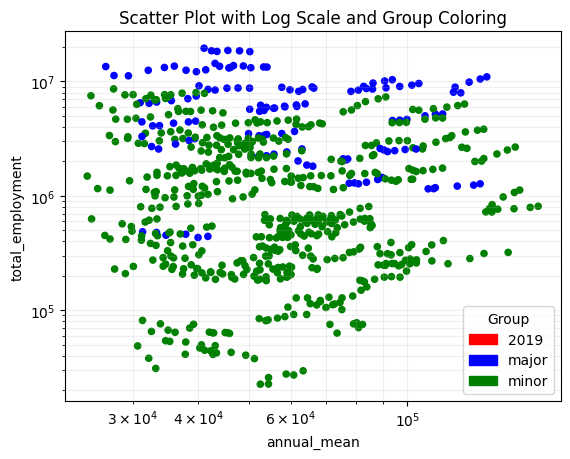

In [365]:
# Define colors for each group
group_colors = {'2019': 'red', 'major': 'blue', 'minor': 'green'}
color_list = [group_colors[g] for g in df_plot['occupation_level']]

# Create the scatter plot with custom colors
fig, ax = plt.subplots()
df_plot.plot.scatter(x='annual_mean', y='total_employment', c=color_list, ax=ax)

# Set logarithmic scale on both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Create custom legend handles
legend_handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
ax.legend(handles=legend_handles, title='Group')

plt.title('Scatter Plot with Log Scale and Group Coloring')
plt.grid(True, which="both", ls="-", alpha=0.2) # Add grid for better log scale visualization
plt.show()

## Final plots

In [366]:
occupation_level = None # options = ["minor", "major"]
occupation_title = None #None ["Tour and Travel Guides", "Communications Equipment Operators", "Management Occupations"]

level_mask = pd.Series(data=True, index=df_plot.index) if occupation_level is None else df_plot["occupation_level"] == occupation_level
title_mask = pd.Series(data=True, index=df_plot.index) if occupation_title is None else df_plot["occupation_title"] == occupation_title

In [367]:
df_aux = df_plot.loc[
    (level_mask)
    & (title_mask)
]

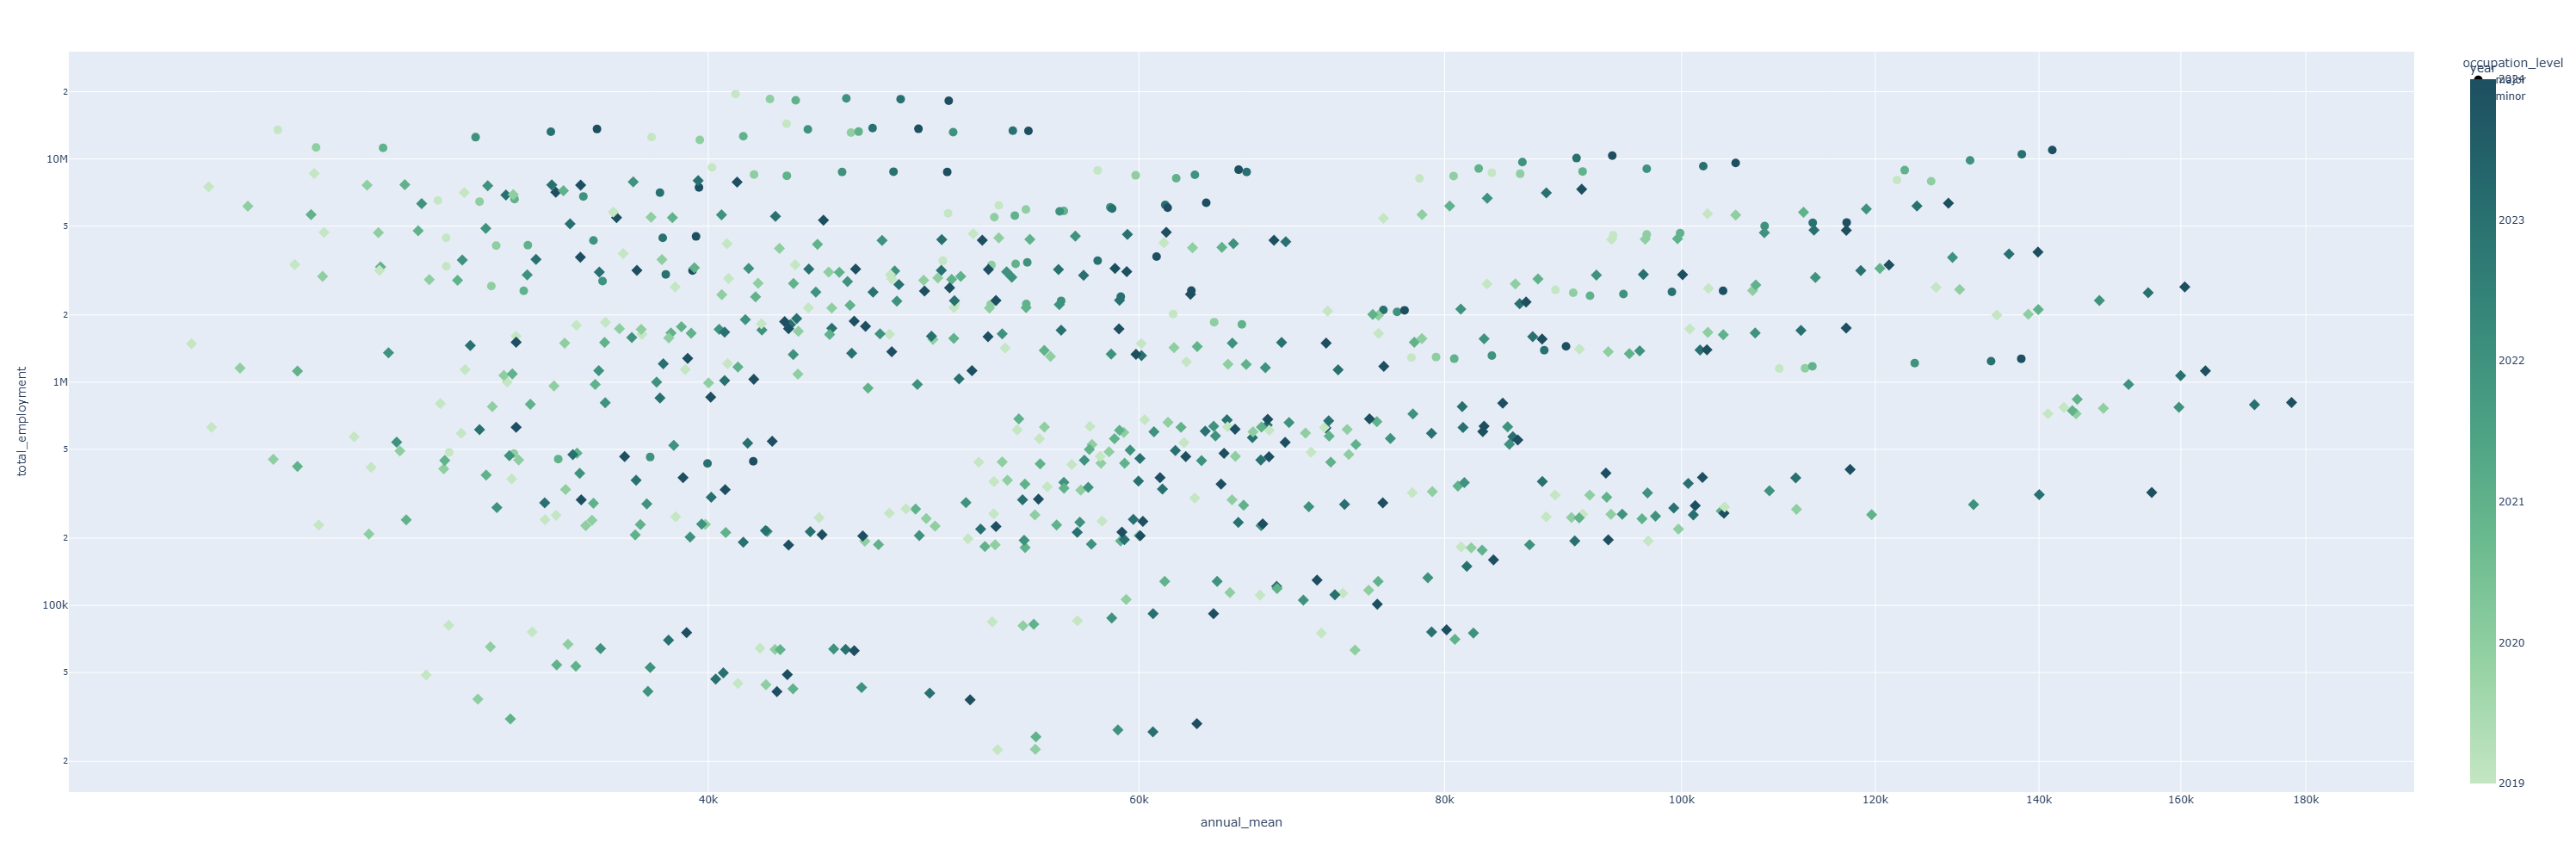

In [369]:
fig = px.scatter(
    df_aux, 
    x="annual_mean", 
    y="total_employment", 
    log_x=True, 
    log_y=True,
    symbol="occupation_level",
    color="year",
    color_continuous_scale="blugrn",
    hover_data="occupation_title",
    width=1000, 
    height=1000
)

fig.update_traces(marker=dict(size=10))
fig

In [359]:
df_aux = df_plot.loc[
    (level_mask)
    & (title_mask)
]

data_columns = [column for column in df_final.columns if "annual" in column]
df_aux = df_aux[["year"] + data_columns].groupby("year").mean()
df_aux = df_aux.reset_index()

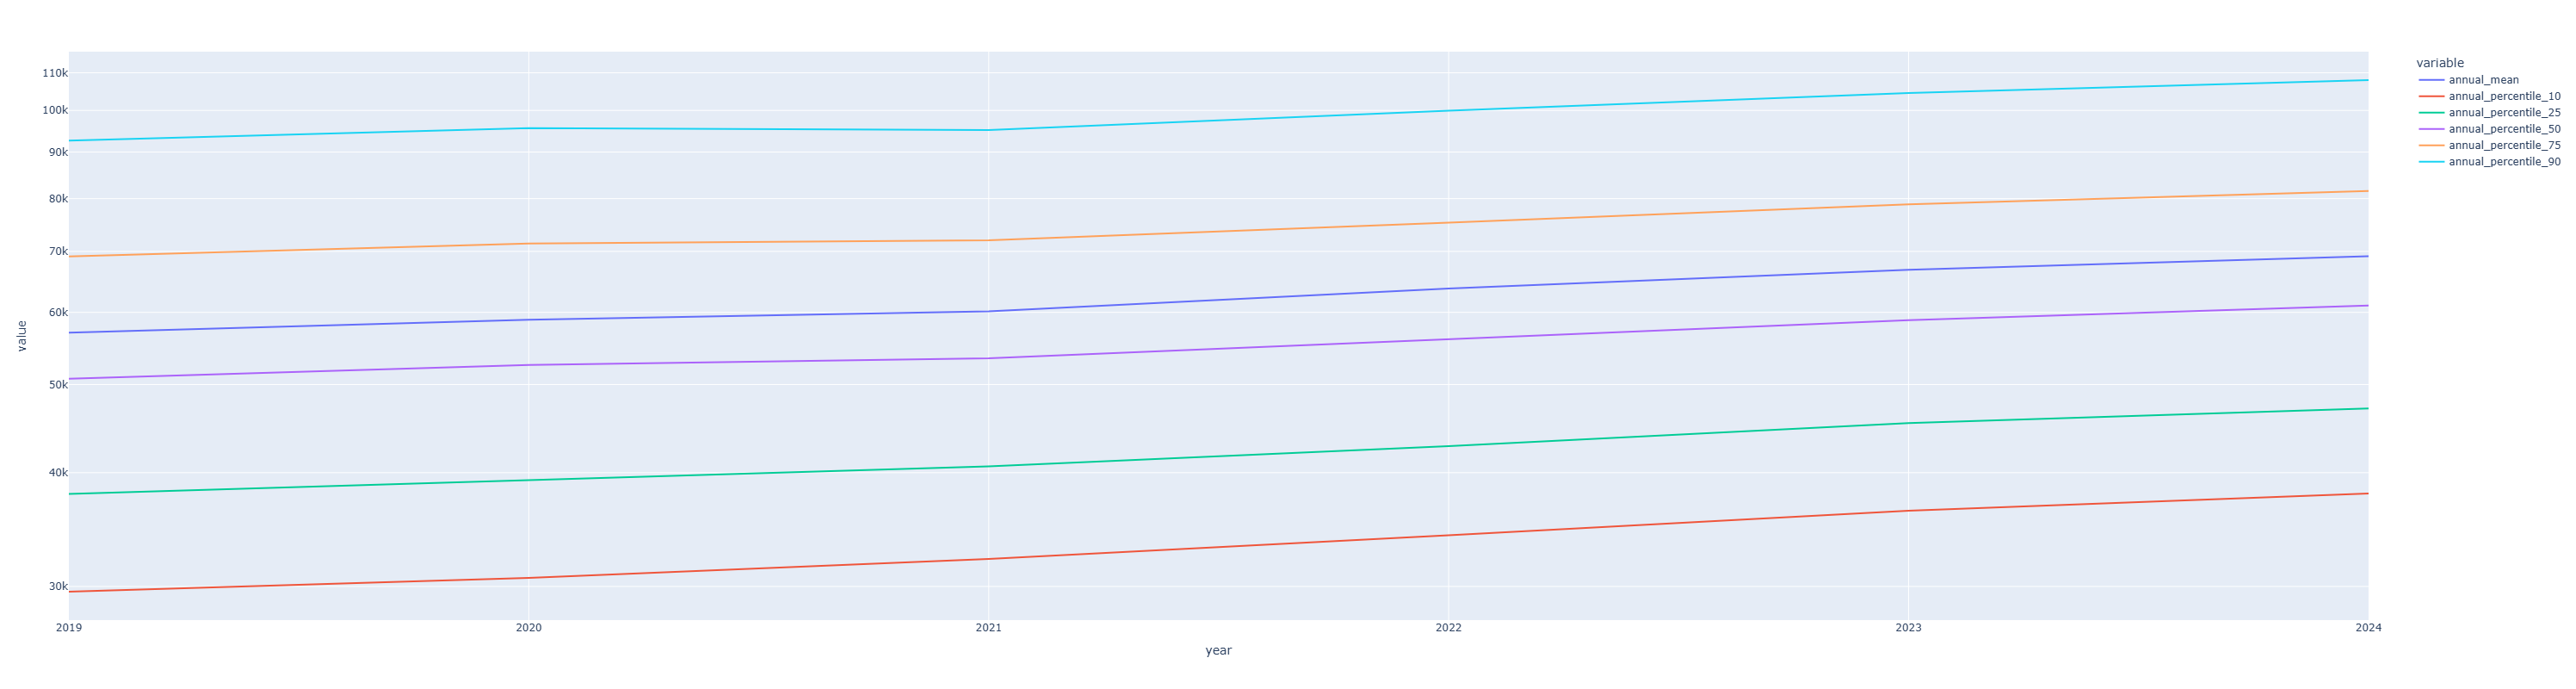

In [360]:
# add note that total for minor and major could be different -> some groups could have more titles under them, or create a weighted average with number of total employment

px.line(
    df_aux, 
    x = "year", 
    y = [
        "annual_mean", 
        "annual_percentile_10", 
        "annual_percentile_25", 
        "annual_percentile_50", 
        "annual_percentile_75", 
        "annual_percentile_90",
    ],
    log_y=True,
    width=1000, 
    height=800
)